<a href="https://colab.research.google.com/github/shammimoon/Exploratory_data_analysis_of_the_car_prices/blob/master/Exploratory_data_analysis_of_the_car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1**

In [267]:

#importing the dataset from my local drive
from google.colab import files
uploaded = files.upload()
#choose the dataset you wanna work with: 

Saving data.csv to data (3).csv


In [268]:
#importing the libraries and give your dataset a name:
import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

In [269]:

#import the necessary libraries:
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [270]:
#The top 5 rows in your dataset:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [271]:
#All the info we need about the dataset: datatypes,no of rows and columns,checking if any column is entirely null or not...
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [272]:
#shape of your data:
data.shape

(11914, 16)

In [273]:
#statistical details of the dataset:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# **STEP 2** 

On carefully observing the data values, we find that Engine Type,Number of Doors,Market Category attributes doesn't really help in predicting the price.
Hence,we can drop the columns which are not so helpful in the prediction. 

In [274]:
df = data.drop(['Engine Fuel Type','Number of Doors','Market Category'], axis=1)
df.head(5)
#check the top 5 rows again

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [275]:
#check the shape of your datset again:
df.shape

(11914, 13)

# **STEP 3:**

In [276]:
#Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "TransmissionType": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "citympg": "MPG-C", "MSRP": "Price"
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

In [277]:
#just checking if the columns are dropped and are renamed successfully:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **STEP 4**:

check for any duplicates in the data :

In [278]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (792, 13)


Drop the duplicate rows:

In [279]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


check for any null values :

In [280]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


## Removing the null value rows from each column:

In [281]:
bool_series = pd.notnull(df['HP'])  
    
# filtering data  
# displayind data only with Gender = Not NaN  
df=df[bool_series]  

In [282]:
bool_series = pd.notnull(df['Cylinders'])  
    
# filtering data  
# displayind data only with Gender = Not NaN  
df=df[bool_series]  

check for null values again:

In [283]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# **STEP 5:**

In the below boxplots, we find many outliers:

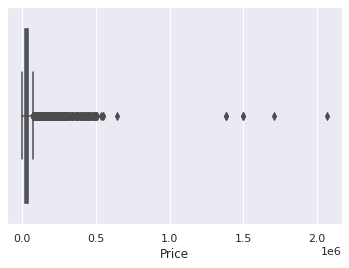

In [284]:
sns.boxplot(x=df['Price'])

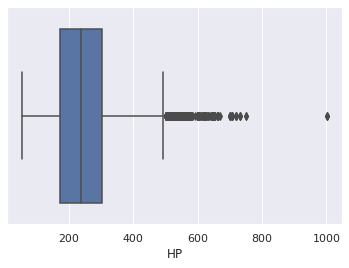

In [285]:
sns.boxplot(x=df['HP'])

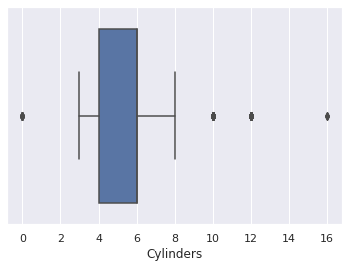

In [286]:
sns.boxplot(x=df['Cylinders'])

## we use the following algorithm to remove outliers from our dataset residing in any axis:

In [287]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [288]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8546, 13)

## Plot the boxplot again to check if there are any outliers left from any attribute[link text](https://):

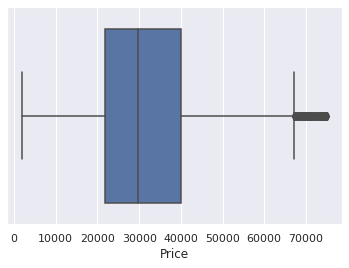

In [289]:
sns.boxplot(x=df['Price'])

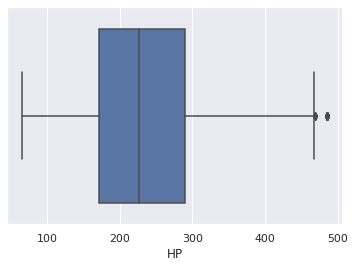

In [290]:
sns.boxplot(x=df['HP'])

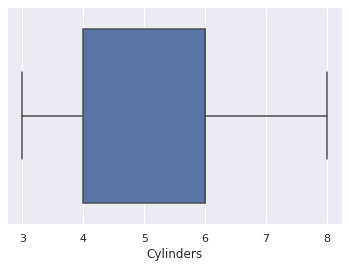

In [291]:
sns.boxplot(x=df['Cylinders'])

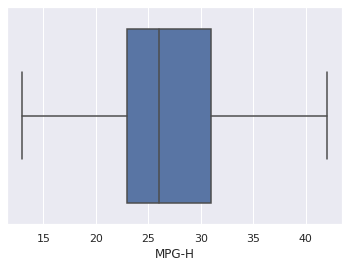

In [292]:
sns.boxplot(x=df['MPG-H'])

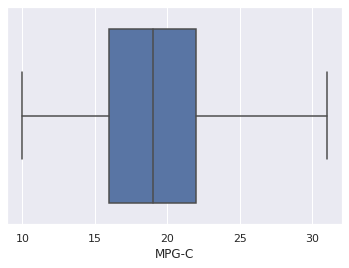

In [293]:
sns.boxplot(x=df['MPG-C'])

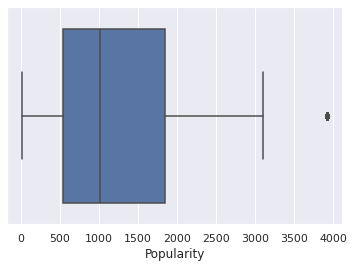

In [294]:
sns.boxplot(x=df['Popularity'])

# **STEP 6:**

## Find out which car brands are the most represented in the dataset:

In [295]:
#find the top 10 car brands with high value counts:
data['Make'].value_counts()[:10]

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Nissan         558
GMC            515
Honda          449
Mazda          423
Cadillac       397
Name: Make, dtype: int64

In [296]:
#  Find the Percentage of car per brand:
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
top_brands=counts.index[:10]


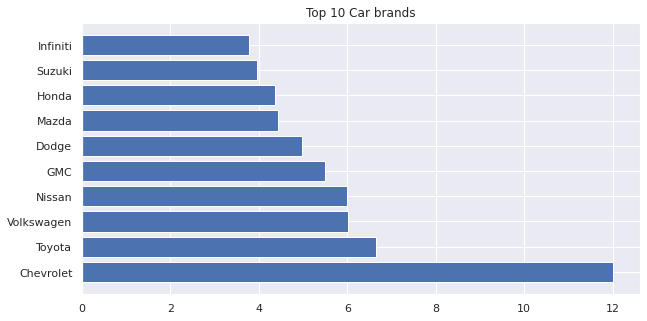

In [297]:
#plot the histogram representing the top 10 car brands:
plt.figure(figsize=(10,5))
plt.barh(top_brands, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [298]:
#find the average prices of each car brand:
avg_prices= df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                     (df['Make'] == 'Suzuki')|
                                     (df['Make'] == 'Volkswagen')|
                                     (df['Make'] == 'Toyota')|
                                     (df['Make'] == 'Dodge')|
                                     (df['Make'] == 'Nissan')|
                                     (df['Make'] == 'GMC')|
                                     (df['Make'] == 'Honda')|
                                     (df['Make'] == 'Mazda')|
                                     (df['Make'] == 'Infiniti')].groupby('Make').mean()
print(avg_prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


# **STEP 7:**

## Plot the correlation matrix for the datset to know the relation between different variables:

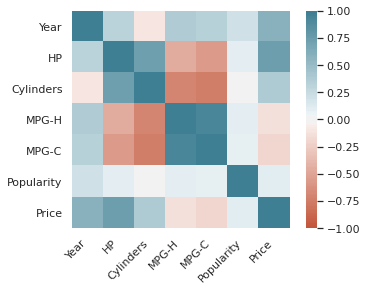

In [299]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Inference:
1.Price,year and HP are positively correlated.
  
> as HP and Year(currency value) increase
  Price simultaneously increases.

2.MPG-H,MPG-C and Cylinders,HP have strong negative dependency with each other.

> As MPG-H,MPG-C increase HP, No.Of Cylinders    decrease strongly.

> Also,the increase in MPG-C and MPG-H have a weaker negative dependecy with Price.


> More the city MPG or Highway MPG, lower the fuel cosumption and hence low no.of Cylinders.



3.HP and Cylinders are positively dependent on each other.

> More the Cylinders,more the power of the car.



# **STEP 8:**EDA

## Plot the Heatmap to know the exact values of correlativity:

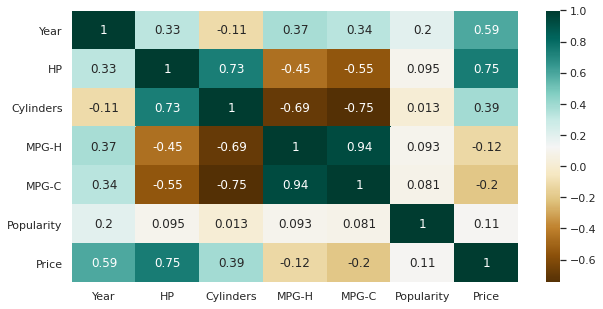

In [300]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

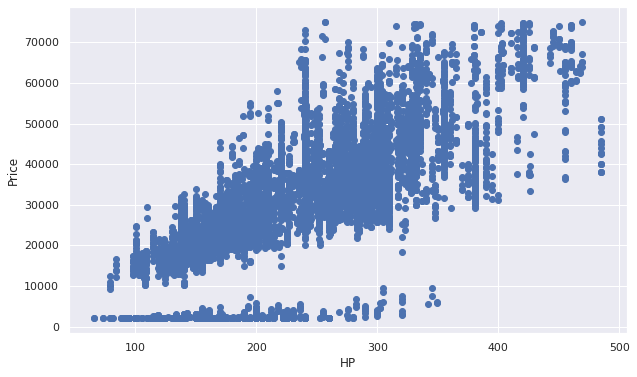

In [301]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

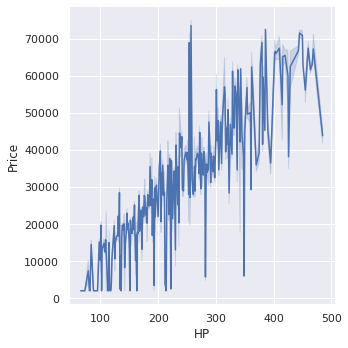

In [302]:
sns.relplot(x="HP", y="Price", kind="line", data=df);


## The above scatterplot and relplot indicates a sharp trend line between HP and price.

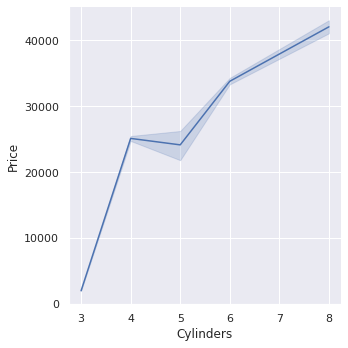

In [303]:
sns.relplot(x="Cylinders", y="Price", kind="line", data=df);


## The above rel plot indicates a point where the Price actually decreased with the No.of cylinders increased!!

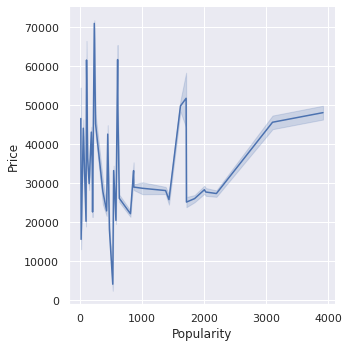

In [304]:
sns.relplot(x="Popularity", y="Price", kind="line", data=df);

## The above rel plot indicates that even the low popular cars have a high price and price increases relatively slower for most popular cars.

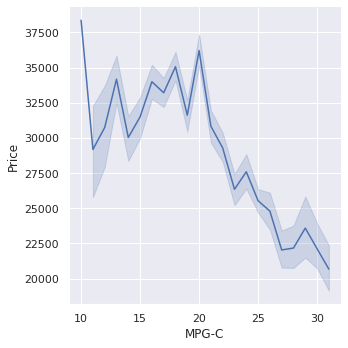

In [305]:
sns.relplot(x="MPG-C", y="Price", kind="line", data=df);

## The above rel plot shows that price is higher for lower MPG-C cars.

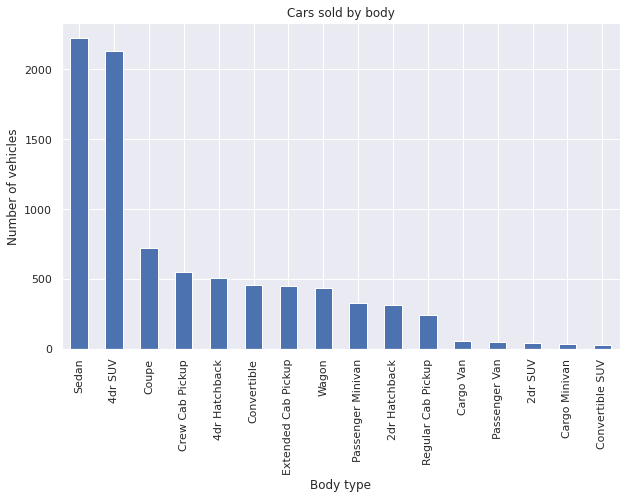

In [306]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

Here from the chart we can see that Sedan cars were the most sold cars followed by 4dr SUV.

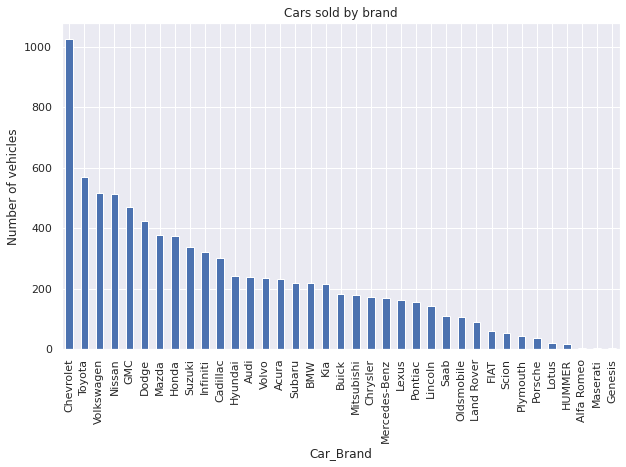

In [307]:
df['Make'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'brands' variable
plt.title("Cars sold by brand")
plt.ylabel('Number of vehicles')
plt.xlabel('Car_Brand');

## Obviously,the most sold brand was chevrolet!

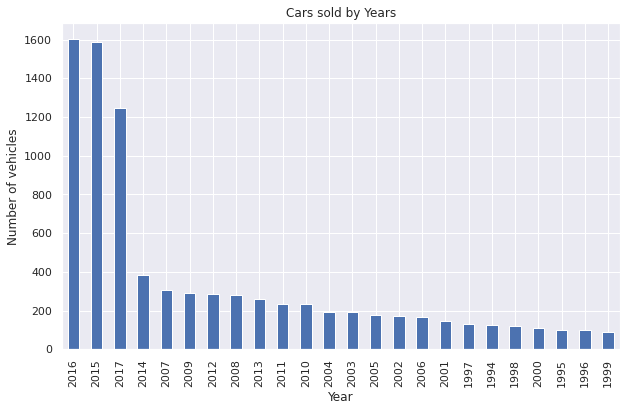

In [308]:
df['Year'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'Years' variable
plt.title("Cars sold by Years")
plt.ylabel('Number of vehicles')
plt.xlabel('Year');

## Cars sales were higher in the years 2015-2017..

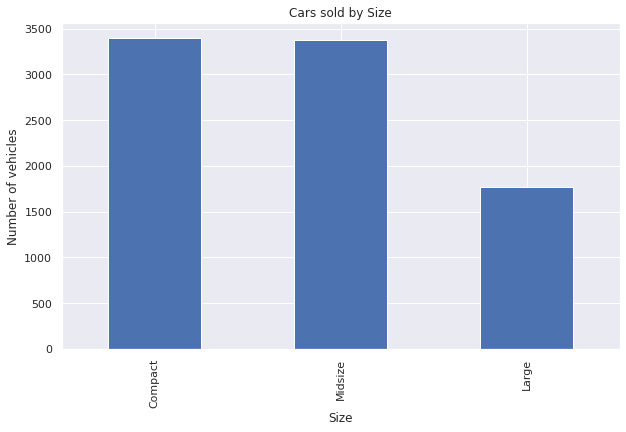

In [309]:
df['Vehicle Size'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'Size' variable
plt.title("Cars sold by Size")
plt.ylabel('Number of vehicles')
plt.xlabel('Size');

## Compared to large cars compact and midsize cars were sold the most!

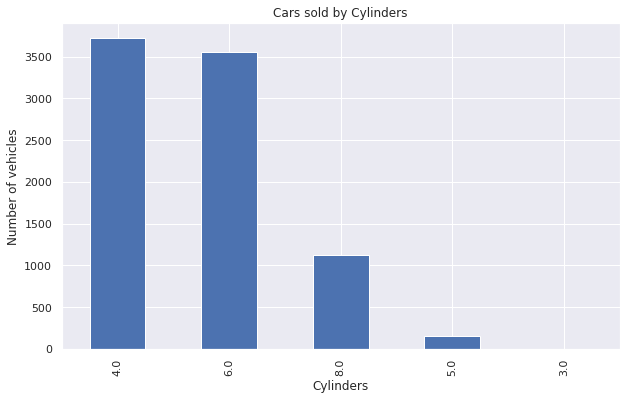

In [310]:
df['Cylinders'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'Cylinders' variable
plt.title("Cars sold by Cylinders")
plt.ylabel('Number of vehicles')
plt.xlabel('Cylinders');

## cars having the more no. of cylinders were sold the most!

> Indented block



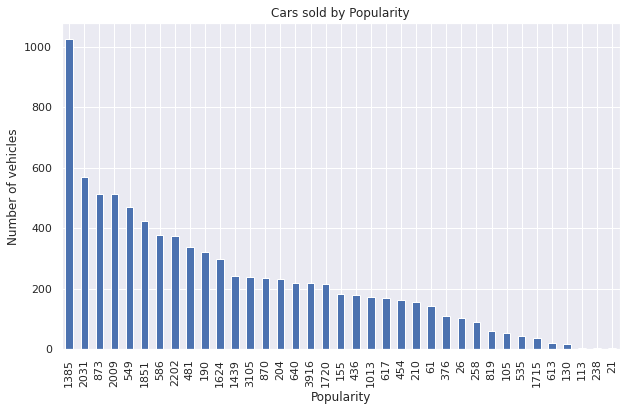

In [311]:
df['Popularity'].value_counts().plot.bar(figsize=(10,6))                      # Bar chart for car 'popularity' variable
plt.title("Cars sold by Popularity")
plt.ylabel('Number of vehicles')
plt.xlabel('Popularity');

## According to the above graph,popularity didn,t really play a much greater role in the no.of vehicles sold!

Text(0.5, 0, 'Count of vehicles')

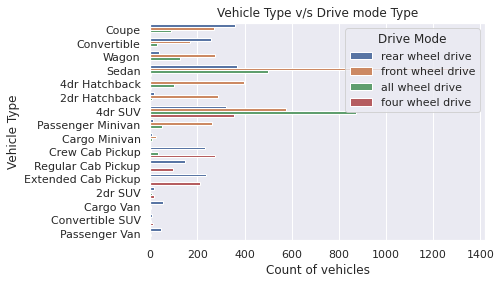

In [312]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')


## Sedans had  more front wheel drive mode types and 4dr SUV's had more all wheel drive mode typeand few front wheel drive mode type.

## As we cannot plot all the price vales with the no.of cars sold,we determine a price range for the cars sold:

In [313]:
# Create a new column 'Price_group' and assign the value based on car price
df['price_group'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_group'] = df['price_group'].astype(object)

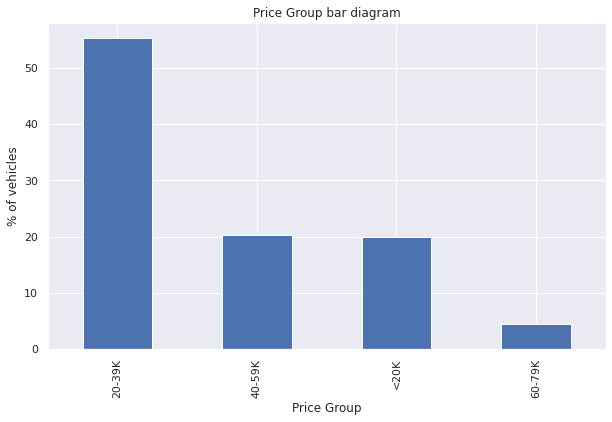

In [314]:
#plot the histogram for the price ranges and no.of vehicles sold:
(df['price_group'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

## From the above histogram,we find that most of the cars sold are in the range:20-39 k.which also depicts that most of the sales are from ordinary civilians.

#  **STEP 9:**Base ML Model

In [315]:
#import the necessary libraries:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [316]:
#seperate the dependent and target variables into x and y of the datsets:
x=df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y=df['Price'].values
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [317]:
#split the data into train and test datasets of ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [318]:
#print the shape of the x and y training and test data set:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6836, 6) (6836, 1)
(1710, 6) (1710, 1)


LINEAR REGRESSION:The Base Model

In [319]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)

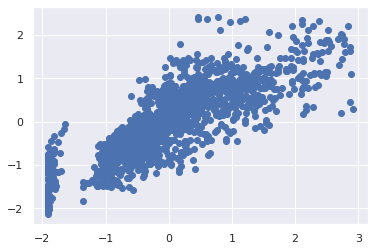

In [320]:
# Predicting the Test set results
Y_pred = model.predict(X_test)
plt.scatter(Y_test,Y_pred)

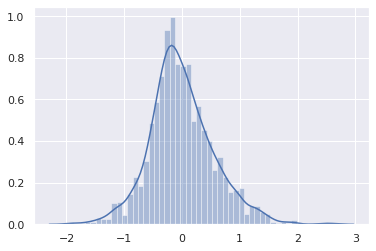

In [321]:
#plot the test set results:
sns.distplot((Y_test-Y_pred),bins=50)

In [322]:
#printing the predicted value by the model:
Y_pred=model.predict(X_test)
print('Price:',Y_pred,sep='\n')

Price:
[[ 0.43390462]
 [ 0.16879174]
 [ 0.67833542]
 ...
 [-1.17677881]
 [ 0.00476257]
 [ 0.15604816]]


In [323]:
#calculating the accuracy:
model.score(X_test,Y_pred)

1.0

In [324]:
#find the MAE,RMSE,R2 scores:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.4256788993790141
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161141


#  **STEP 10**:Different Algorithms on the dataset.

POLYNOMIAL REGRESSION:

In [325]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

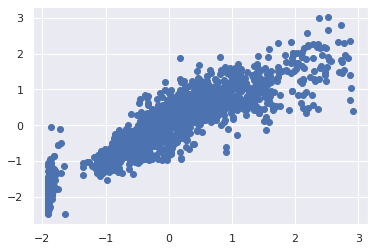

In [326]:
# Predicting a new result with Polynomial Regression
Y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(Y_test,Y_pred)

In [327]:
#find the MAE,RMSE,R2 scores:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test, y_pred))

Mean Absolute Error: 0.3218429808781939
Root Mean Squared Error: 0.4404877468674202
R2 Score: 0.8005065769728177


SUPPORT VECTOR REGRESSION:

In [328]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

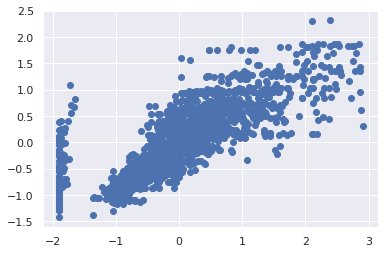

In [329]:
# Predicting a new result with SVR:
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

In [330]:
#find the MAE,RMSE,R2 scores:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.4226952372078232
Root Mean Squared Error: 0.6121821538106879
R2 Score: 0.6146793820156877


RANDOM FOREST REGRESSION:

In [331]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

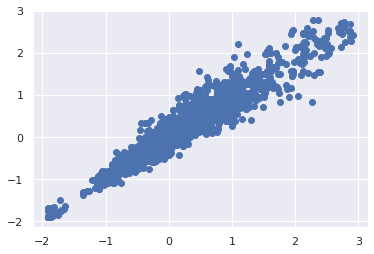

In [332]:
# Predicting a new result with Random Forest Regression:
Y_pred = regressor.predict(X_test)
plt.scatter(Y_test,Y_pred)

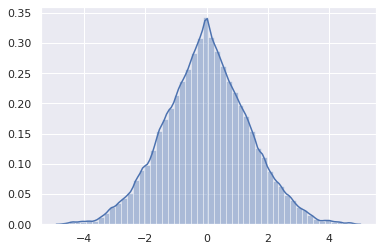

In [333]:
#plotting the result with distplot:
sns.distplot((Y_test-Y_pred),bins=50)

In [334]:
#find the MAE,RMSE,R2 scores:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 0.17751795759723996
Root Mean Squared Error: 0.24732105122050158
R2 Score: 0.9371097840942101


## Random Forest Regression gives the most accurate score.